**Libraries**

In [ ]:
#importing the neccessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

**Importing data and finding Missing Values**

In [ ]:
# importing the data into the code

data = pd.read_csv("gld_price_data.csv")

# checking if there is any missing value

print(data.isnull().sum())

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [ ]:
# prints the first 5 rows of the data

data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# printing the last 5 rows to find the total number values

data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# to find the number of rows and columns

data.shape

(2290, 6)

In [ ]:
# statistical measure of the data

data.describe() #describe shows the statistical measures such as mean, median of the data

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Finding the how gold is correlated to other labels**

In [ ]:
# checking the correlation to find if the data are directly or indirectly correlated
date_removed = data.drop(columns=["Date"])
correlation = date_removed.corr() # this shows the positive and negative correlation
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


**Training and spliting the data**

In [ ]:

X = date_removed
y = data["GLD"]

#spliting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

**Calculation using Function**

In [ ]:
# function to evaluate the regression

def regression_evaluation (y,yhat):
  ei = y - yhat
  ei2 = ei**2
  mse = ei2.mean()
  rmse = mse**0.5
  ei_abs = ei.abs()
  mae = ei_abs.mean()
  sse = ei2.sum()
  sst = ((y - y.mean())**2).sum()
  r2 = 1 - (sse/sst)

  print("MSE: ", mse)
  print("MAE: ", mae)
  print("R^2: ", r2)

**Linear Regression**

In [ ]:
# training the Linear Regression model

Linear_model = LinearRegression()

# fitting the model
Linear_model.fit(X_train, y_train)

# evaluating the data
linear_yhat_train = Linear_model.predict(X_train)
linear_yhat_test = Linear_model.predict(X_test)

print("Linear Regression: ")
print()
print("Train Evaluation: ")
regression_evaluation(y_train, linear_yhat_train)
print()
print("Test Evaluation: ")
regression_evaluation(y_test, linear_yhat_test)

Linear Regression: 

Train Evaluation: 
MSE:  1.2852604140903218e-26
MAE:  9.666794293714376e-14
R^2:  1.0

Test Evaluation: 
MSE:  1.4184890310405563e-26
MAE:  1.0239262131040745e-13
R^2:  1.0


**K-nearest Neighbors**

In [ ]:
# training the K-nearest Neighbors model

KNN_model = KNeighborsRegressor(n_neighbors=3)

# fitting the model
KNN_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# evaluating the data
KNN_yhat_train = KNN_model.predict(X_train)
KNN_yhat_test = KNN_model.predict(X_test)

print("K-nearest Neighbors: ")
print()
print("Train Evaluation: ")
regression_evaluation(y_train, KNN_yhat_train)
print()
print("Test Evaluation: ")
regression_evaluation(y_test, KNN_yhat_test)

K-nearest Neighbors: 

Train Evaluation: 
MSE:  1.8301771153605513
MAE:  0.9190827429039299
R^2:  0.9964974087707638

Test Evaluation: 
MSE:  5.635564060967177
MAE:  1.600496607714702
R^2:  0.9908886289676146


**Decision Tree**

In [ ]:
# training the Decision Tree model

DT_model = DecisionTreeRegressor()

# fitting the model
DT_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# evaluating the data

DecisionTree_yhat_train = DT_model.predict(X_train)
DecisionTree_yhat_test = DT_model.predict(X_test)

print("Decision Tree: ")
print()
print("Train Evaluation: ")
regression_evaluation(y_train, DecisionTree_yhat_train)
print()
print("Test Evaluation: ")
regression_evaluation(y_test, DecisionTree_yhat_test)

Decision Tree: 

Train Evaluation: 
MSE:  6.614030297049531e-31
MAE:  4.654210059563975e-17
R^2:  1.0

Test Evaluation: 
MSE:  0.11024818896911126
MAE:  0.09362415065502182
R^2:  0.9998217548155821


**Multi Layer Preceptron**

In [ ]:
#training the MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state= 20)

#fitting the model
mlp.fit(X_train, y_train)

MLPRegressor(max_iter=1000, random_state=20)

In [ ]:
#evaluating the model

MLP_yhat_train = mlp.predict(X_train)
MLP_yhat_test = mlp.predict(X_test)

print("Multi Layer Preceptron: ")
print()
print("Train Evaluation: ")
regression_evaluation(y_train, MLP_yhat_train)
print()
print("Test Evaluation: ")
regression_evaluation(y_test, MLP_yhat_test)

Multi Layer Preceptron: 

Train Evaluation: 
MSE:  0.09684370926667264
MAE:  0.2775114656369331
R^2:  0.9998146606009674

Test Evaluation: 
MSE:  0.0994430703363257
MAE:  0.27847624670097526
R^2:  0.9998392241307823


Classification Analysis

Converting the Regression Dataset into a Classification Dataset

In [ ]:
# Convert the target variable 'GLD' into discrete classes
def classify_gld(price): #Defining the classification function
    if price < 27:
        return 'Low'
    elif 27 <= price < 35:
        return 'Medium'
    else:
        return 'High'

data['GLD_Class'] = data['GLD'].apply(classify_gld)

In [ ]:
# Spliting the data into features and target variable
X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = data['GLD_Class']

In [ ]:
# Drop the original 'GLD' column
data = data.drop(columns=['GLD'])

# Display the first few rows of the modified dataset
print(data.head())

       Date          SPX        USO     SLV   EUR/USD GLD_Class
0  1/2/2008  1447.160034  78.470001  15.180  1.471692      High
1  1/3/2008  1447.160034  78.370003  15.285  1.474491      High
2  1/4/2008  1411.630005  77.309998  15.167  1.475492      High
3  1/7/2008  1416.180054  75.500000  15.053  1.468299      High
4  1/8/2008  1390.189941  76.059998  15.590  1.557099      High


 Applying Classification Algorithms

Desicion Tree Model

In [ ]:
# Spliting the dataset into training and testing sets
X = data.drop(columns=['GLD_Class', 'Date'])
y = data['GLD_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train) #Fitting the model on the training data

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_train_hat = dt_classifier.predict(X_train)
y_hat_dt = dt_classifier.predict(X_test)

In [ ]:
# Evaluating the model on the training set
train_accuracy = accuracy_score(y_train, y_train_hat)
train_classification_report = classification_report(y_train, y_train_hat)

In [ ]:
# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_hat_dt)
test_classification_report = classification_report(y_test, y_hat_dt)

In [ ]:
# Evaluations
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_hat_dt))
print("Precision:", precision_score(y_test, y_hat_dt, average='macro'))
print("Recall:", recall_score(y_test, y_hat_dt, average='macro'))
print("F1 Score:", f1_score(y_test, y_hat_dt, average='macro'))
print(classification_report(y_test, y_hat_dt))

Decision Tree Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       687

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



In [ ]:
# Checking for overfitting
if train_accuracy > test_accuracy:
    print("The model is overfitting as the training accuracy is higher than the test accuracy.")
else:
    print("The model is not overfitting.")

The model is not overfitting.


K-Nearest Neighbors Model (KNN)

In [ ]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Prediction of KNN Model
y_hat_knn = knn_classifier.predict(X_test)

In [ ]:
# Evaluation of the KNN model
print("K-Nearest Neighbors Classifier")
print("Accuracy:", accuracy_score(y_test, y_hat_knn))
print("Precision:", precision_score(y_test, y_hat_knn, average='macro'))
print("Recall:", recall_score(y_test, y_hat_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_hat_knn, average='macro'))
print(classification_report(y_test, y_hat_knn))

K-Nearest Neighbors Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       687

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



Multilayer Perceptop Classifier Model

In [ ]:
# Multilayer Perceptron Classifier
mlp_classifier = MLPClassifier(random_state=42, max_iter=300)
mlp_classifier.fit(X_train, y_train)

# Predictions of the model
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluation of the model
print("Multilayer Perceptron Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp, average='macro'))
print("Recall:", recall_score(y_test, y_pred_mlp, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_mlp, average='macro'))
print(classification_report(y_test, y_pred_mlp))

Multilayer Perceptron Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       687

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



Desicion tree Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Decision Tree Hyperparameter Tuning
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_

In [ ]:
# Predictions
y_pred_best_dt = best_dt.predict(X_test)

In [ ]:
# Evaluation
print("Optimized Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test, y_pred_best_dt, average='macro'))
print("Recall:", recall_score(y_test, y_pred_best_dt, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_best_dt, average='macro'))
print(classification_report(y_test, y_pred_best_dt))

Optimized Decision Tree Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       687

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



KNN Hyperparameter Tuning

In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_

In [ ]:
# Predictions
y_pred_best_knn = best_knn.predict(X_test)

In [ ]:
# Evaluation
print("Optimized K-Nearest Neighbors Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Precision:", precision_score(y_test, y_pred_best_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_best_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_best_knn, average='macro'))
print(classification_report(y_test, y_pred_best_knn))

Optimized K-Nearest Neighbors Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       687

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



MLP Hyperparamter Tuning

In [ ]:
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}
grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), mlp_params, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

best_mlp = grid_search_mlp.best_estimator_

In [ ]:
# Predictions
y_pred_best_mlp = best_mlp.predict(X_test)

In [ ]:
# Evaluation
print("Optimized Multilayer Perceptron Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_best_mlp))
print("Precision:", precision_score(y_test, y_pred_best_mlp, average='macro'))
print("Recall:", recall_score(y_test, y_pred_best_mlp, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_best_mlp, average='macro'))
print(classification_report(y_test, y_pred_best_mlp))

Optimized Multilayer Perceptron Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       687

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



##STEP 3: CLUSTERING ANALYSIS


In [ ]:
# Remove the classification label 'GLD_Class' and the 'Date' column
data_for_clustering = data.drop(columns=['GLD_Class', 'Date'])

# Standardize the data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data_for_clustering.columns)

print(data_scaled_df.head())


        SPX       USO       SLV   EUR/USD
0 -0.399145  2.388810 -0.691720  1.429753
1 -0.399145  2.383687 -0.676912  1.451035
2 -0.467604  2.329381 -0.693553  1.458646
3 -0.458837  2.236652 -0.709630  1.403954
4 -0.508915  2.265342 -0.633900  2.079145


K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

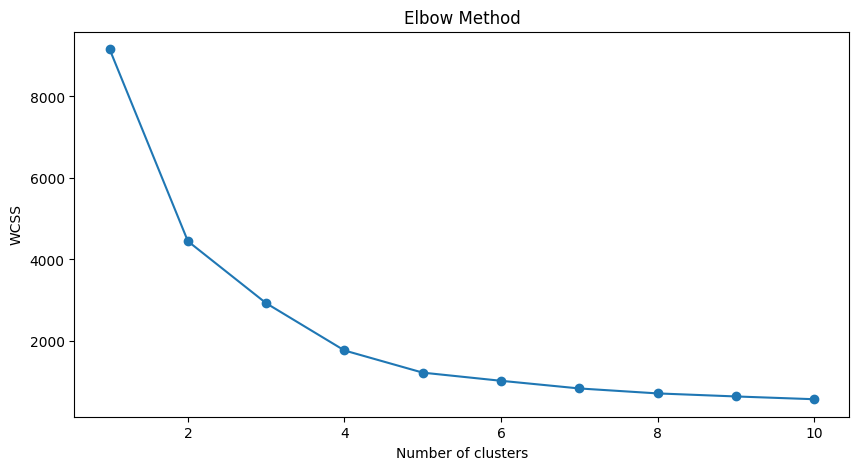

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the appropriate number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow Method, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled_df)


Hierarchical Clustering

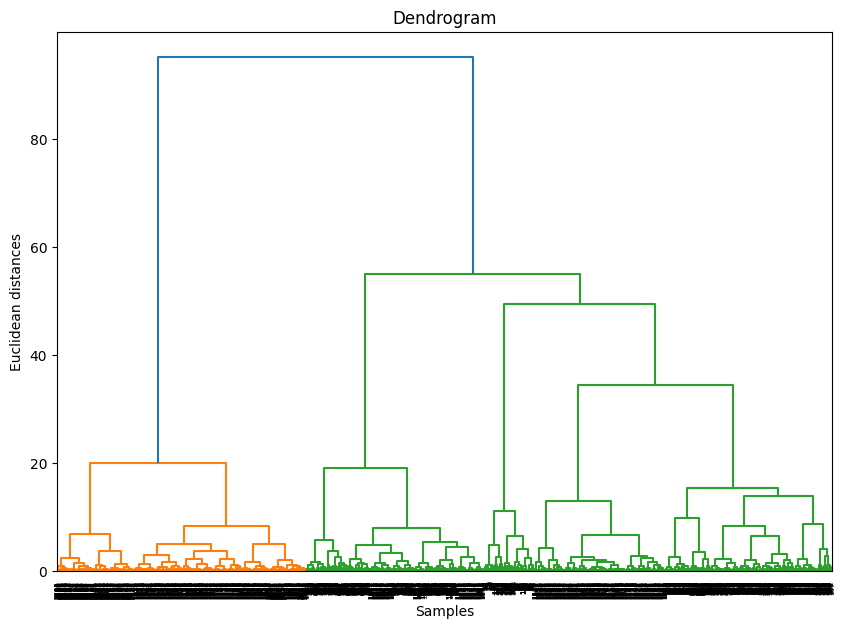

        SPX       USO       SLV   EUR/USD  KMeans_Labels  HC_Labels
0 -0.399145  2.388810 -0.691720  1.429753              0          0
1 -0.399145  2.383687 -0.676912  1.451035              0          0
2 -0.467604  2.329381 -0.693553  1.458646              0          0
3 -0.458837  2.236652 -0.709630  1.403954              0          0
4 -0.508915  2.265342 -0.633900  2.079145              0          0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Choose the number of clusters from the dendrogram
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(data_scaled_df)

# Add clustering labels to the dataframe
data_scaled_df['KMeans_Labels'] = kmeans_labels
data_scaled_df['HC_Labels'] = hc_labels

print(data_scaled_df.head())


##Evaluate Clustering Models
Compare with Classification Labels

In [ ]:
from sklearn.metrics import v_measure_score, homogeneity_score, completeness_score, silhouette_score

# Add the classification labels back to the scaled data
data_scaled_df['GLD_Class'] = data['GLD_Class']

# Map the class labels to numerical values
class_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
data_scaled_df['GLD_Class_Num'] = data_scaled_df['GLD_Class'].map(class_mapping)

# Calculate evaluation metrics
v_measure_kmeans = v_measure_score(data_scaled_df['GLD_Class_Num'], data_scaled_df['KMeans_Labels'])
homogeneity_kmeans = homogeneity_score(data_scaled_df['GLD_Class_Num'], data_scaled_df['KMeans_Labels'])
completeness_kmeans = completeness_score(data_scaled_df['GLD_Class_Num'], data_scaled_df['KMeans_Labels'])

v_measure_hc = v_measure_score(data_scaled_df['GLD_Class_Num'], data_scaled_df['HC_Labels'])
homogeneity_hc = homogeneity_score(data_scaled_df['GLD_Class_Num'], data_scaled_df['HC_Labels'])
completeness_hc = completeness_score(data_scaled_df['GLD_Class_Num'], data_scaled_df['HC_Labels'])

print(f"K-Means V-Measure: {v_measure_kmeans}")
print(f"K-Means Homogeneity: {homogeneity_kmeans}")
print(f"K-Means Completeness: {completeness_kmeans}")

print(f"Hierarchical Clustering V-Measure: {v_measure_hc}")
print(f"Hierarchical Clustering Homogeneity: {homogeneity_hc}")
print(f"Hierarchical Clustering Completeness: {completeness_hc}")


K-Means V-Measure: 0.0
K-Means Homogeneity: 1.0
K-Means Completeness: 0.0
Hierarchical Clustering V-Measure: 0.0
Hierarchical Clustering Homogeneity: 1.0
Hierarchical Clustering Completeness: 0.0


Silhouette Score

In [ ]:
# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(data_scaled_df.drop(['KMeans_Labels', 'HC_Labels', 'GLD_Class', 'GLD_Class_Num'], axis=1), kmeans_labels)
print('K-Means Silhouette Score:', kmeans_silhouette)

# Silhouette Score for Hierarchical Clustering
hc_silhouette = silhouette_score(data_scaled_df.drop(['KMeans_Labels', 'HC_Labels', 'GLD_Class', 'GLD_Class_Num'], axis=1), hc_labels)
print('Hierarchical Clustering Silhouette Score:', hc_silhouette)


K-Means Silhouette Score: 0.5013640990560173
Hierarchical Clustering Silhouette Score: 0.4690178456975489
